In [21]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r"C:\Users\maria\Downloads\final_weather_data_DEF.csv")

# Load mood data
spain_mood = pd.read_csv("spain_data.csv")
sweden_mood = pd.read_csv("sweden_data.csv")

In [22]:
df.head()
df.columns

Index(['datetime', 'temp', 'humidity', 'precip', 'windspeed', 'cloudcover',
       'visibility', 'uvindex', 'city', 'year_month', 'year', 'month', 'day',
       'day_of_week', 'season', 'temp_roll7'],
      dtype='object')

In [23]:
spain_mood.head()
sweden_mood.head()
spain_mood.columns
sweden_mood.columns

Index(['date', 'country', 'n', 'score'], dtype='object')

In [24]:
weather_df = pd.read_csv(r"C:\Users\maria\Downloads\final_weather_data_DEF.csv")
spain_df = pd.read_csv("spain_data.csv")
sweden_df = pd.read_csv("sweden_data.csv")

In [25]:
print("Weather columns:", weather_df.columns)
print("Spain mood columns:", spain_df.columns)
print("Sweden mood columns:", sweden_df.columns)

Weather columns: Index(['datetime', 'temp', 'humidity', 'precip', 'windspeed', 'cloudcover',
       'visibility', 'uvindex', 'city', 'year_month', 'year', 'month', 'day',
       'day_of_week', 'season', 'temp_roll7'],
      dtype='object')
Spain mood columns: Index(['date', 'country', 'n', 'score'], dtype='object')
Sweden mood columns: Index(['date', 'country', 'n', 'score'], dtype='object')


In [26]:
spain_df.rename(columns={"date_column_name": "datetime"}, inplace=True)
sweden_df.rename(columns={"date_column_name": "datetime"}, inplace=True)

In [27]:
spain_df.rename(columns={"date": "datetime"}, inplace=True)
sweden_df.rename(columns={"date": "datetime"}, inplace=True)

In [28]:
weather_df["datetime"] = pd.to_datetime(weather_df["datetime"])
spain_df["date"] = pd.to_datetime(spain_df["datetime"])
sweden_df["date"] = pd.to_datetime(sweden_df["datetime"])

In [29]:
print("🇪🇸 Spain datetime dtype:", spain_df["datetime"].dtype)
print("🇸🇪 Sweden datetime dtype:", sweden_df["datetime"].dtype)

print("\nSample values from Spain:")
print(spain_df["datetime"].head())

print("\nSample values from Sweden:")
print(sweden_df["datetime"].head())

🇪🇸 Spain datetime dtype: object
🇸🇪 Sweden datetime dtype: object

Sample values from Spain:
0    2019-01-01
1    2019-01-02
2    2019-01-03
3    2019-01-04
4    2019-01-05
Name: datetime, dtype: object

Sample values from Sweden:
0    2019-01-01
1    2019-01-02
2    2019-01-03
3    2019-01-04
4    2019-01-05
Name: datetime, dtype: object


In [30]:
spain_df["datetime"] = pd.to_datetime(spain_df["datetime"])
sweden_df["datetime"] = pd.to_datetime(sweden_df["datetime"])

In [31]:
print("🇪🇸 Spain datetime dtype:", spain_df["datetime"].dtype)
print("🇸🇪 Sweden datetime dtype:", sweden_df["datetime"].dtype)

🇪🇸 Spain datetime dtype: datetime64[ns]
🇸🇪 Sweden datetime dtype: datetime64[ns]


In [32]:
spain_df["city"] = "Barcelona"
sweden_df["city"] = "Stockholm"

In [33]:
mood_df = pd.concat([spain_df, sweden_df], ignore_index=True)

In [34]:
merged_df = pd.merge(weather_df, mood_df, on=["datetime", "city"], how="inner")

In [35]:
print(merged_df.shape)
merged_df.head()

(3202, 20)


,datetime,temp,humidity,precip,windspeed,cloudcover,visibility,uvindex,city,year_month,year,month,day,day_of_week,season,temp_roll7,country,n,score,date
0,2019-01-01,8.8,76.3,0.0,16.5,22.3,15.6,4.0,Barcelona,2019-01,2019,1,1,1,winter,8.80,Spain,74727,0.632933,2019-01-01
1,2019-01-02,7.3,67.7,0.0,20.2,5.8,16.4,4.0,Barcelona,2019-01,2019,1,2,2,winter,8.05,Spain,73857,0.597488,2019-01-02
2,2019-01-03,5.8,72.7,0.0,17.9,5.6,15.0,4.0,Barcelona,2019-01,2019,1,3,3,winter,7.30,Spain,77294,0.590331,2019-01-03
3,2019-01-04,5.3,74.7,0.0,16.5,19.9,13.4,4.0,Barcelona,2019-01,2019,1,4,4,winter,6.80,Spain,74888,0.592296,2019-01-04
4,2019-01-05,6.8,66.9,0.0,16.8,11.3,13.1,4.0,Barcelona,2019-01,2019,1,5,5,winter,6.80,Spain,78497,0.597714,2019-01-05


In [36]:
print(merged_df.isna().sum())

datetime       0
temp           0
humidity       0
precip         0
windspeed      0
cloudcover     0
visibility     0
uvindex        0
city           0
year_month     0
year           0
month          0
day            0
day_of_week    0
season         0
temp_roll7     0
country        0
n              0
score          0
date           0
dtype: int64


In [37]:
merged_df.to_csv("weather_mood_merged.csv", index=False)

In [38]:
merged_df.info()
merged_df.isna().sum()
merged_df.duplicated().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3202 entries, 0 to 3201
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   datetime     3202 non-null   datetime64[ns]
 1   temp         3202 non-null   float64       
 2   humidity     3202 non-null   float64       
 3   precip       3202 non-null   float64       
 4   windspeed    3202 non-null   float64       
 5   cloudcover   3202 non-null   float64       
 6   visibility   3202 non-null   float64       
 7   uvindex      3202 non-null   float64       
 8   city         3202 non-null   object        
 9   year_month   3202 non-null   object        
 10  year         3202 non-null   int64         
 11  month        3202 non-null   int64         
 12  day          3202 non-null   int64         
 13  day_of_week  3202 non-null   int64         
 14  season       3202 non-null   object        
 15  temp_roll7   3202 non-null   float64       
 16  countr

np.int64(0)

In [39]:
# Define bins and labels
bins = [0.0, 0.2, 0.35, 0.5, 0.65, 0.8, 1.0]
labels = ['Very Sad / Depressed', 'Sad', 'Slightly Sad', 'Neutral / Mixed', 'Positive', 'Very Positive']
# Apply categorisation to both DataFrames
spain_df['sentiment_category'] = pd.cut(spain_df['score'], bins=bins, labels=labels, include_lowest=True)
sweden_df['sentiment_category'] = pd.cut(sweden_df['score'], bins=bins, labels=labels, include_lowest=True)

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

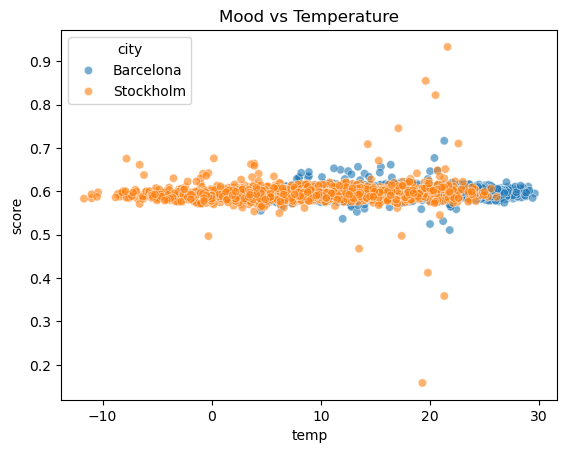

In [42]:
sns.scatterplot(data=merged_df, x="temp", y="score", hue="city", alpha=0.6)
plt.title("Mood vs Temperature")
plt.show()

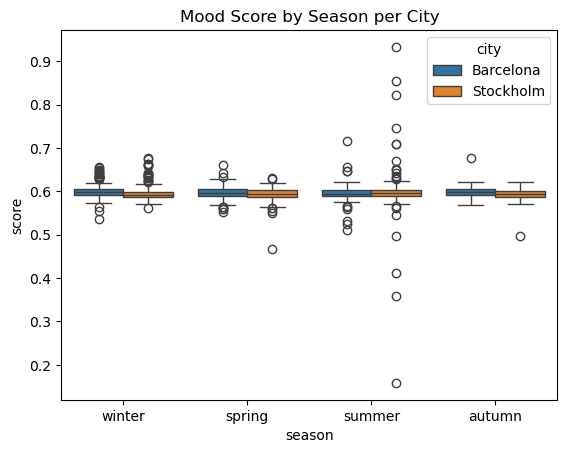

In [43]:
sns.boxplot(data=merged_df, x="season", y="score", hue="city")
plt.title("Mood Score by Season per City")
plt.show()

In [44]:
print(df.columns)

Index(['datetime', 'temp', 'humidity', 'precip', 'windspeed', 'cloudcover',
       'visibility', 'uvindex', 'city', 'year_month', 'year', 'month', 'day',
       'day_of_week', 'season', 'temp_roll7'],
      dtype='object')


In [45]:
print(df[["city", "datetime"]].head())  # Just confirm structure

        city    datetime
0  Barcelona  2019-01-01
1  Barcelona  2019-01-02
2  Barcelona  2019-01-03
3  Barcelona  2019-01-04
4  Barcelona  2019-01-05


In [46]:
print(spain_df.columns)
print(sweden_df.columns)

Index(['datetime', 'country', 'n', 'score', 'date', 'city',
       'sentiment_category'],
      dtype='object')
Index(['datetime', 'country', 'n', 'score', 'date', 'city',
       'sentiment_category'],
      dtype='object')


In [47]:
# Assign country based on city
weather_df["country"] = weather_df["city"].map({
    "Barcelona": "Spain",
    "Stockholm": "Sweden"
})

In [48]:
print(weather_df[["city", "country"]].drop_duplicates())

           city country
0     Barcelona   Spain
2192  Stockholm  Sweden


In [49]:
spain_merged = pd.merge(weather_df[weather_df["country"] == "Spain"], spain_df, on="datetime", how="inner")
sweden_merged = pd.merge(weather_df[weather_df["country"] == "Sweden"], sweden_df, on="datetime", how="inner")

In [50]:
mood_df = pd.concat([spain_df, sweden_df], ignore_index=True)

In [51]:
merged_df = pd.merge(weather_df, mood_df[["datetime", "country", "score"]], 
                     on=["datetime", "country"], how="left")

In [52]:
print(merged_df[["datetime", "city", "country", "score"]].head())
print("Missing scores after merge:", merged_df["score"].isna().sum())

    datetime       city country     score
0 2019-01-01  Barcelona   Spain  0.632933
1 2019-01-02  Barcelona   Spain  0.597488
2 2019-01-03  Barcelona   Spain  0.590331
3 2019-01-04  Barcelona   Spain  0.592296
4 2019-01-05  Barcelona   Spain  0.597714
Missing scores after merge: 1182


In [53]:
# Define bins and labels
bins = [0.0, 0.2, 0.35, 0.5, 0.65, 0.8, 1.0]
labels = ['Very Sad / Depressed', 'Sad', 'Slightly Sad', 'Neutral / Mixed', 'Positive', 'Very Positive']

# Apply the categorization to the merged DataFrame
merged_df['sentiment_category'] = pd.cut(
    merged_df['score'],
    bins=bins,
    labels=labels,
    include_lowest=True
)

In [54]:
merged_df[["datetime", "city", "country", "score", "sentiment_category"]].sample(10)

,datetime,city,country,score,sentiment_category
55,2019-02-25,Barcelona,Spain,0.601254,Neutral / Mixed
1943,2024-04-27,Barcelona,Spain,NaN,NaN
3101,2021-06-28,Stockholm,Sweden,0.580352,Neutral / Mixed
1963,2024-05-17,Barcelona,Spain,NaN,NaN
2460,2019-09-26,Stockholm,Sweden,0.591321,Neutral / Mixed
4271,2024-09-10,Stockholm,Sweden,NaN,NaN
3175,2021-09-10,Stockholm,Sweden,0.605466,Neutral / Mixed
2577,2020-01-21,Stockholm,Sweden,0.598285,Neutral / Mixed
1375,2022-10-07,Barcelona,Spain,0.611293,Neutral / Mixed
3076,2021-06-03,Stockholm,Sweden,0.590088,Neutral / Mixed


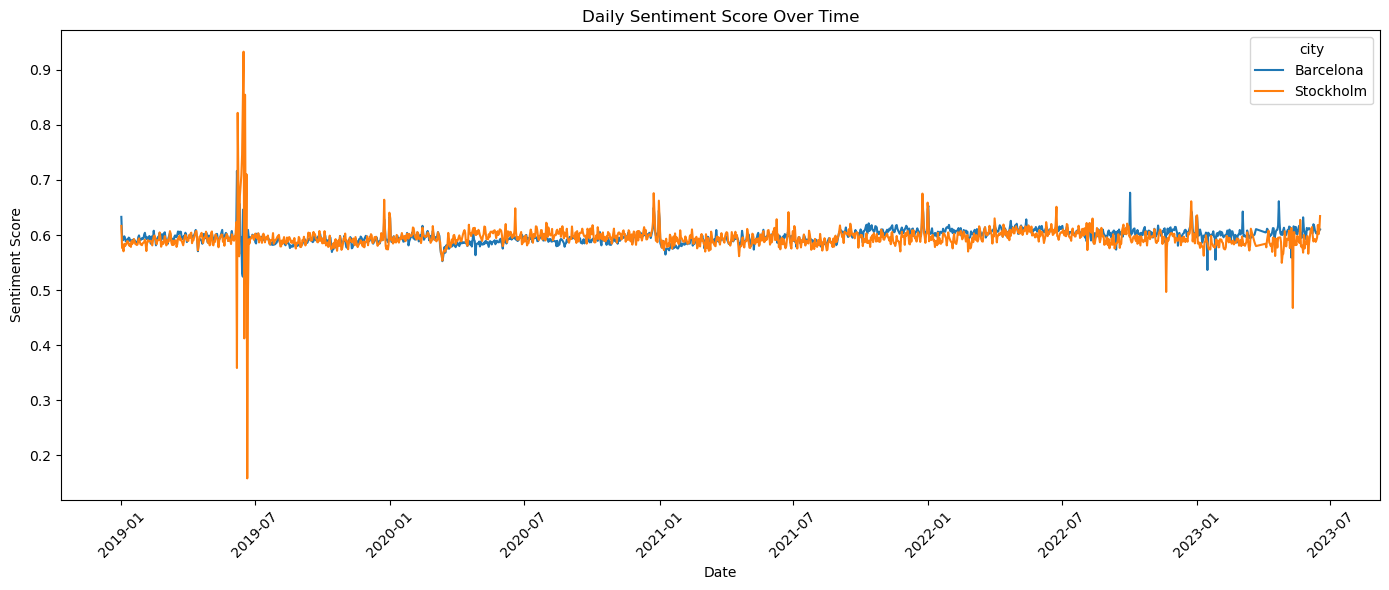

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
sns.lineplot(data=merged_df, x="datetime", y="score", hue="city")
plt.title("Daily Sentiment Score Over Time")
plt.ylabel("Sentiment Score")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [56]:
df.columns

Index(['datetime', 'temp', 'humidity', 'precip', 'windspeed', 'cloudcover',
       'visibility', 'uvindex', 'city', 'year_month', 'year', 'month', 'day',
       'day_of_week', 'season', 'temp_roll7'],
      dtype='object')

In [57]:
import pandas as pd

for var in dir():
    try:
        if isinstance(eval(var), pd.DataFrame):
            print(f"{var} → {eval(var).columns.tolist()}")
    except:
        pass

_15 → ['datetime', 'temp', 'humidity', 'precip', 'windspeed', 'cloudcover', 'visibility', 'uvindex', 'city', 'year_month', 'year', 'month', 'day', 'day_of_week', 'season', 'temp_roll7', 'country', 'n', 'score', 'date']
_35 → ['datetime', 'temp', 'humidity', 'precip', 'windspeed', 'cloudcover', 'visibility', 'uvindex', 'city', 'year_month', 'year', 'month', 'day', 'day_of_week', 'season', 'temp_roll7', 'country', 'n', 'score', 'date']
_54 → ['datetime', 'city', 'country', 'score', 'sentiment_category']
df → ['datetime', 'temp', 'humidity', 'precip', 'windspeed', 'cloudcover', 'visibility', 'uvindex', 'city', 'year_month', 'year', 'month', 'day', 'day_of_week', 'season', 'temp_roll7']
merged_df → ['datetime', 'temp', 'humidity', 'precip', 'windspeed', 'cloudcover', 'visibility', 'uvindex', 'city', 'year_month', 'year', 'month', 'day', 'day_of_week', 'season', 'temp_roll7', 'country', 'score', 'sentiment_category']
mood_df → ['datetime', 'country', 'n', 'score', 'date', 'city', 'sentiment

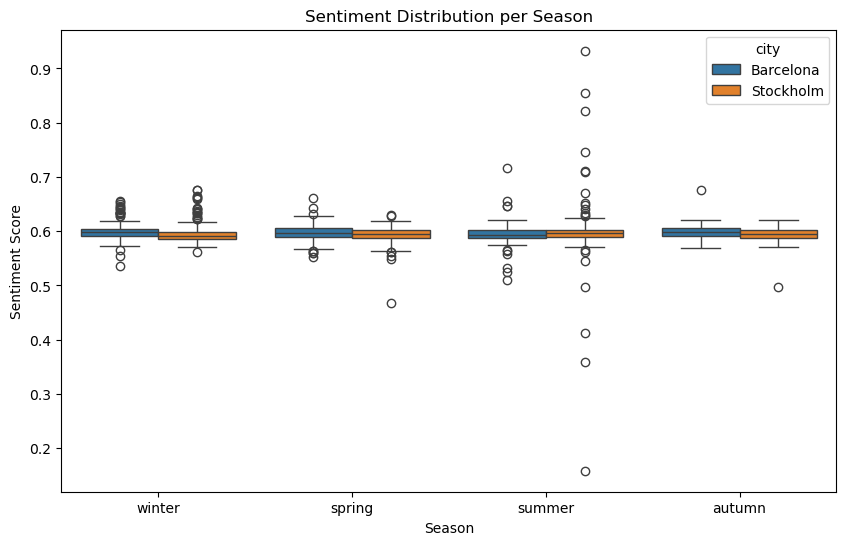

In [58]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df, x="season", y="score", hue="city")
plt.title("Sentiment Distribution per Season")
plt.ylabel("Sentiment Score")
plt.xlabel("Season")
plt.show()

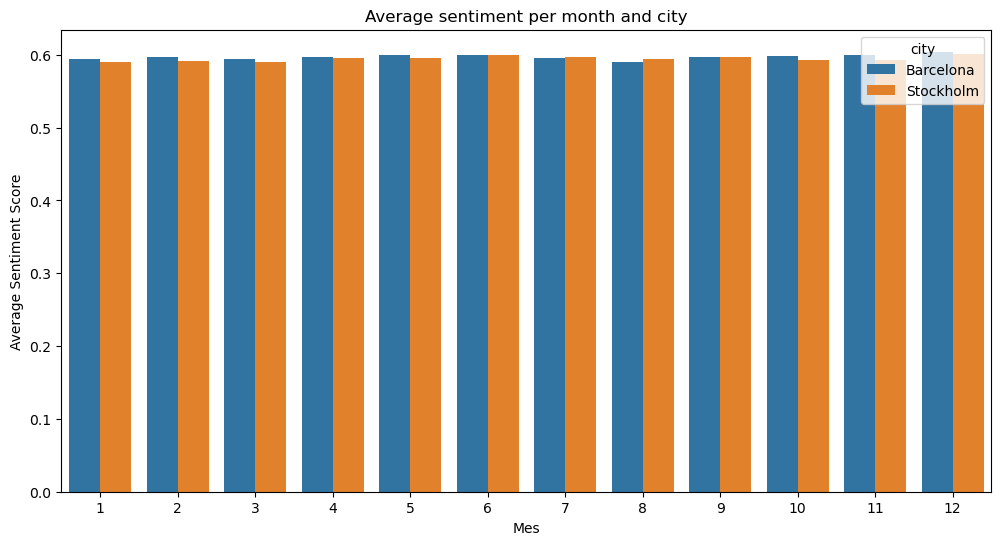

In [59]:
monthly_mood = merged_df.groupby(["month", "city"])["score"].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_mood, x="month", y="score", hue="city")
plt.title("Average sentiment per month and city")
plt.xlabel("Mes")
plt.ylabel("Average Sentiment Score")
plt.show()

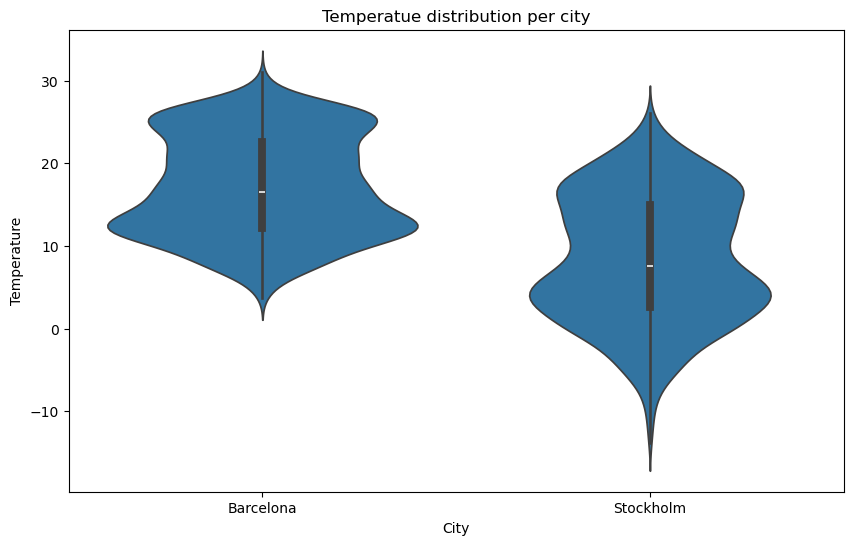

In [60]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=merged_df, x="city", y="temp")
plt.title("Temperatue distribution per city")
plt.ylabel("Temperature")
plt.xlabel("City")
plt.show()

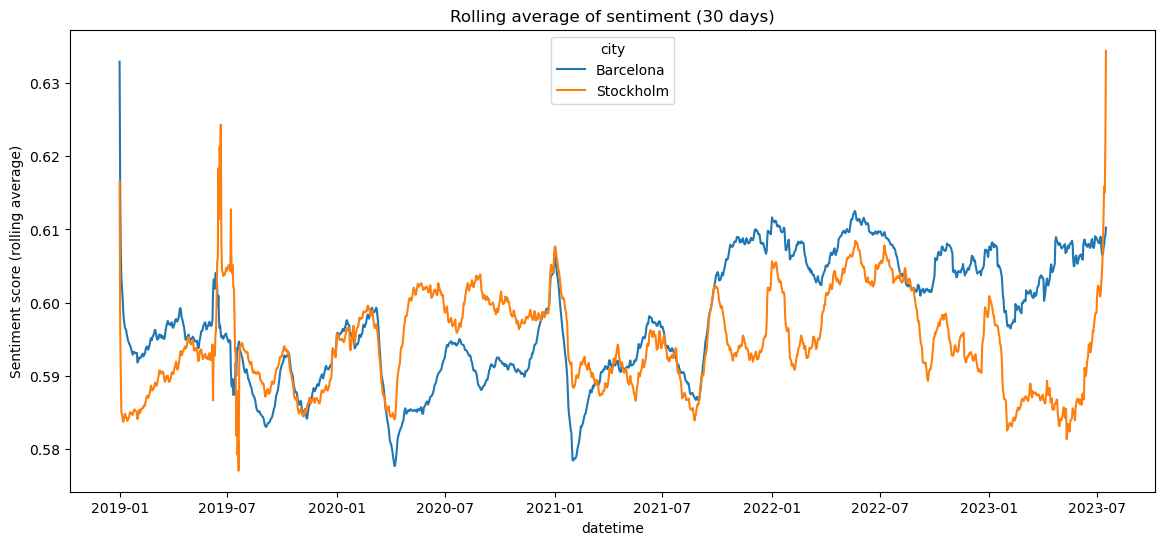

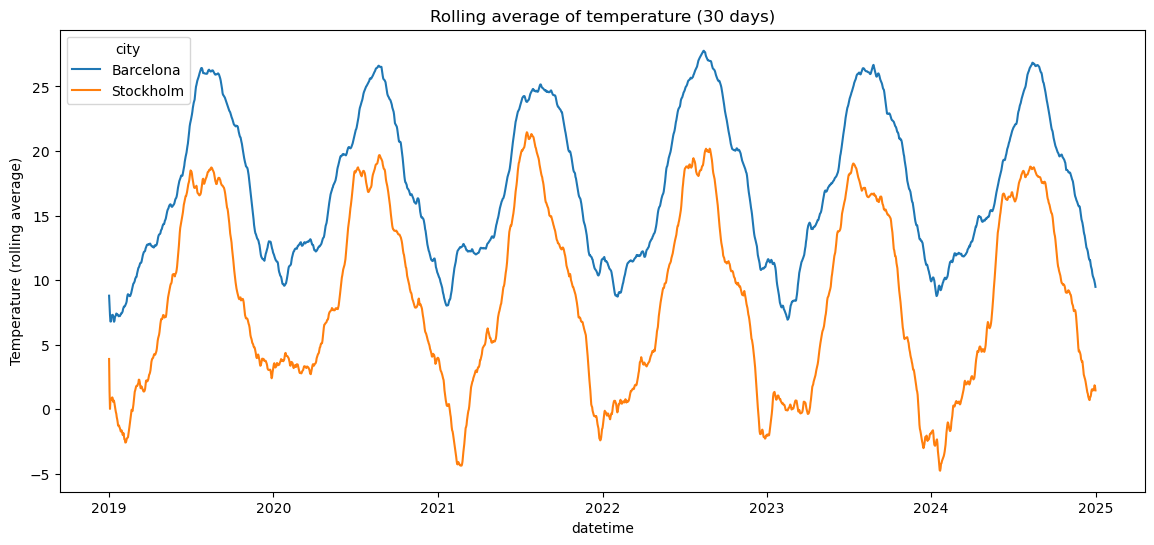

In [61]:
merged_df_sorted = merged_df.sort_values("datetime")
merged_df_sorted["score_roll30"] = merged_df_sorted.groupby("city")["score"].transform(lambda x: x.rolling(30, min_periods=1).mean())
merged_df_sorted["temp_roll30"] = merged_df_sorted.groupby("city")["temp"].transform(lambda x: x.rolling(30, min_periods=1).mean())

plt.figure(figsize=(14, 6))
sns.lineplot(data=merged_df_sorted, x="datetime", y="score_roll30", hue="city")
plt.title("Rolling average of sentiment (30 days)")
plt.ylabel("Sentiment score (rolling average)")
plt.show()

plt.figure(figsize=(14, 6))
sns.lineplot(data=merged_df_sorted, x="datetime", y="temp_roll30", hue="city")
plt.title("Rolling average of temperature (30 days)")
plt.ylabel("Temperature (rolling average)")
plt.show()

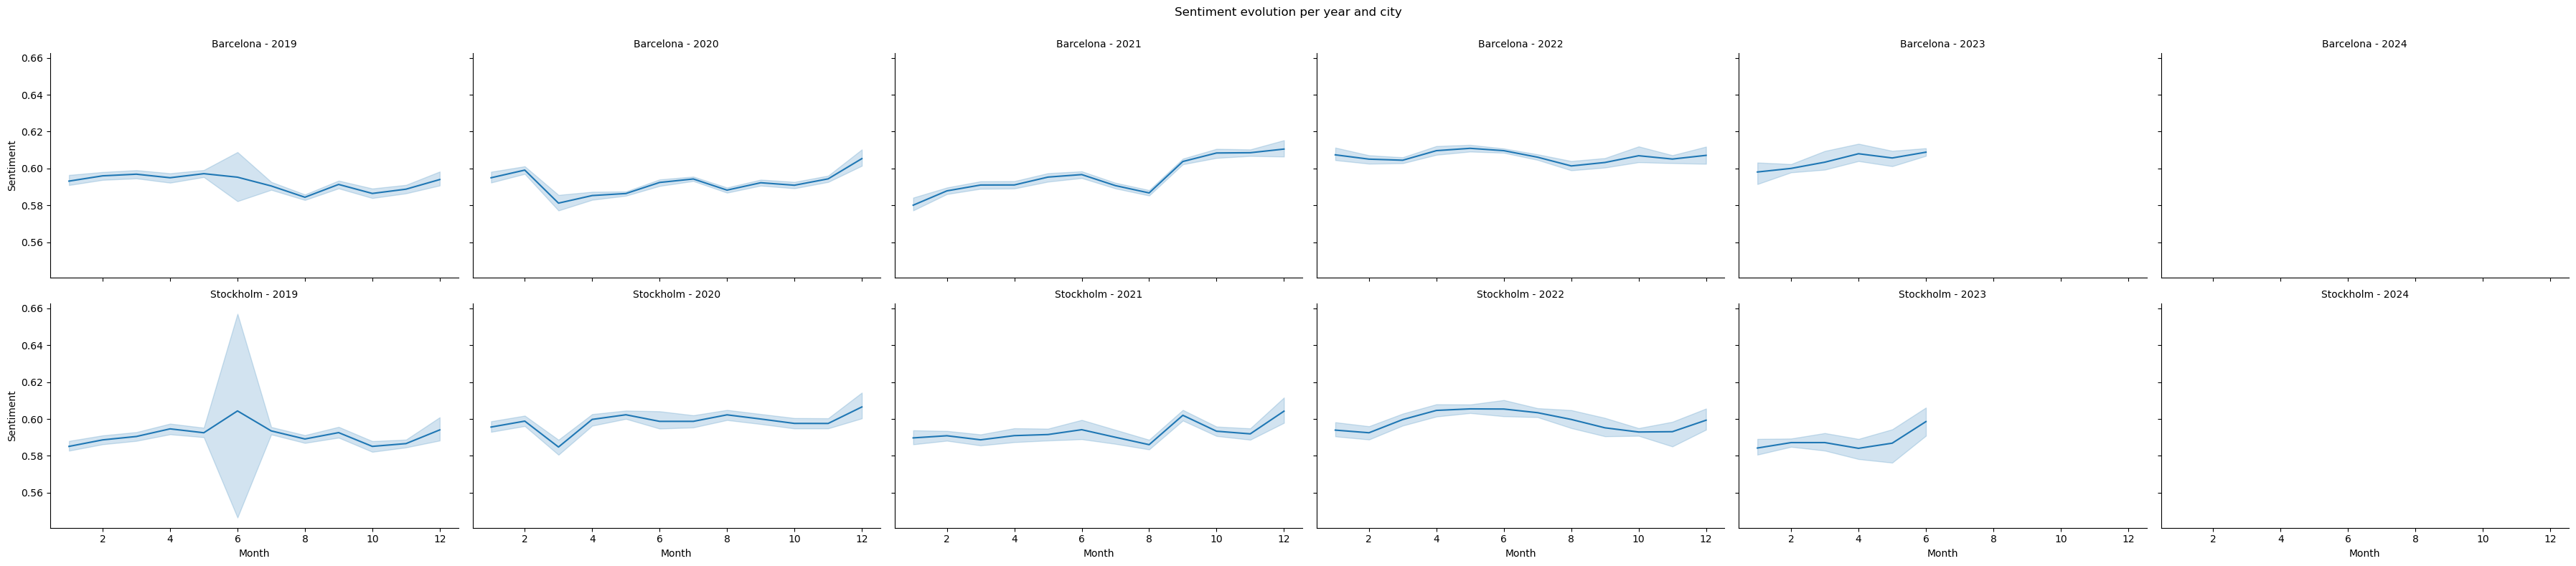

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.FacetGrid(merged_df, col="year", row="city", height=4, aspect=1.5)
g.map(sns.lineplot, "month", "score")
g.set_titles("{row_name} - {col_name}")
g.set_axis_labels("Month", "Sentiment")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Sentiment evolution per year and city")
plt.show()

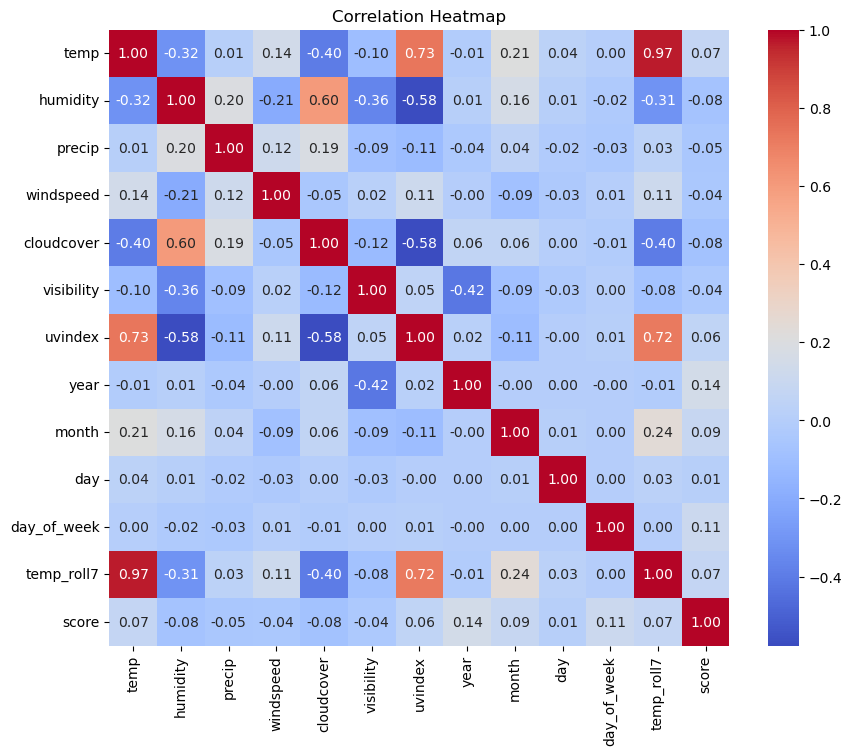

In [63]:
plt.figure(figsize=(10, 8))
sns.heatmap(merged_df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [64]:
def categorize_temp(temp):
    if temp <= 5:
        return 'Cold'
    elif temp >= 25:
        return 'Hot'
    else:
        return 'Moderate'

In [65]:
df['temp_category'] = df['temp'].apply(categorize_temp)

In [66]:
df['temp_roll7_category'] = df['temp_roll7'].apply(categorize_temp)

In [67]:
print(df.columns)

Index(['datetime', 'temp', 'humidity', 'precip', 'windspeed', 'cloudcover',
       'visibility', 'uvindex', 'city', 'year_month', 'year', 'month', 'day',
       'day_of_week', 'season', 'temp_roll7', 'temp_category',
       'temp_roll7_category'],
      dtype='object')


In [68]:
# Convert datetime to datetime type if not already
df['datetime'] = pd.to_datetime(df['datetime'])
mood_df['datetime'] = pd.to_datetime(mood_df['datetime'])

# Merge on datetime and city
df = df.merge(mood_df[['datetime', 'city', 'score']], on=['datetime', 'city'], how='left')

In [69]:
print(df[['datetime', 'city', 'score']].head())

    datetime       city     score
0 2019-01-01  Barcelona  0.632933
1 2019-01-02  Barcelona  0.597488
2 2019-01-03  Barcelona  0.590331
3 2019-01-04  Barcelona  0.592296
4 2019-01-05  Barcelona  0.597714


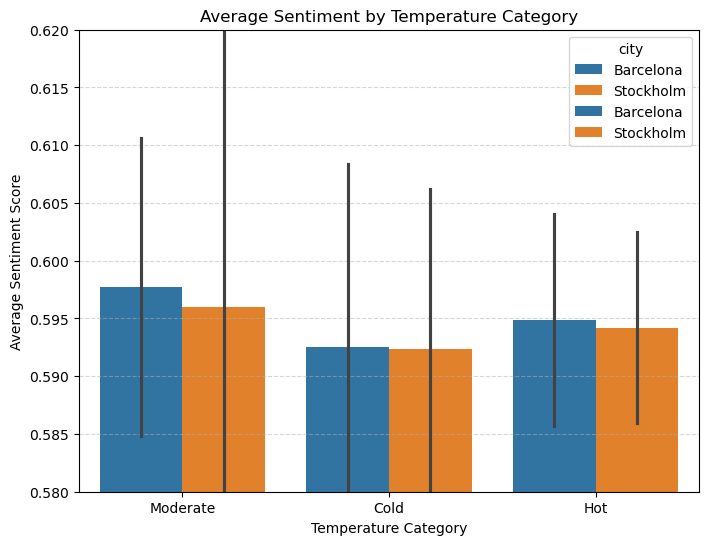

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='temp_category', y='score', hue='city', errorbar='sd')
plt.title("Average Sentiment by Temperature Category")
plt.ylabel("Average Sentiment Score")
plt.xlabel("Temperature Category")
plt.ylim(0.58, 0.62)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
sns.barplot(data=df, x='temp_category', y='score', hue='city', errorbar=None)
plt.show()


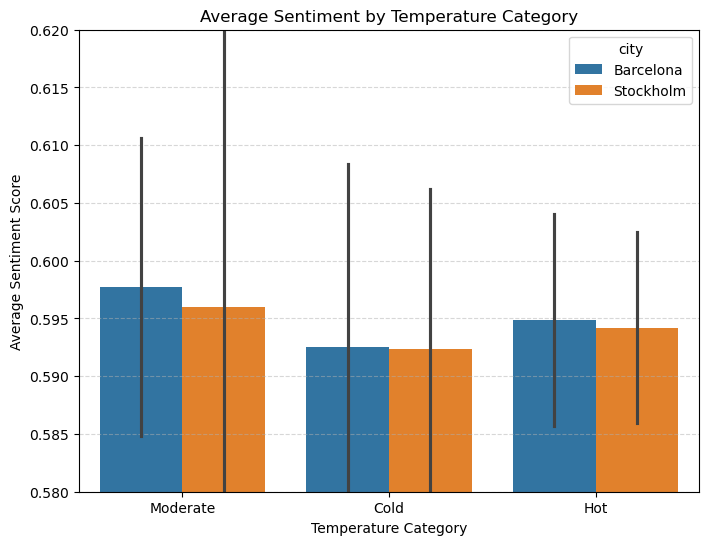

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='temp_category', y='score', hue='city', errorbar='sd')
plt.title("Average Sentiment by Temperature Category")
plt.ylabel("Average Sentiment Score")
plt.xlabel("Temperature Category")
plt.ylim(0.58, 0.62)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.show()

<Axes: xlabel='temp_category', ylabel='score'>

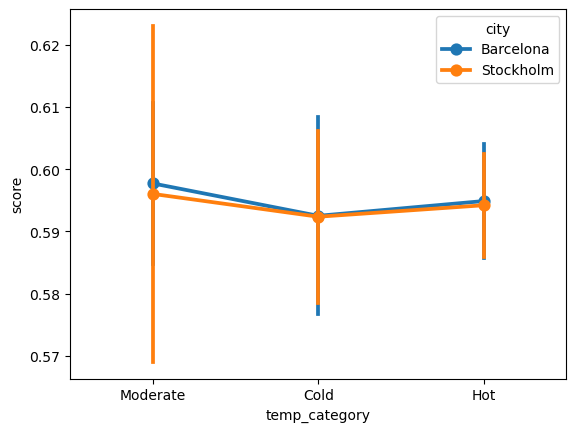

In [74]:
sns.pointplot(data=df, x='temp_category', y='score', hue='city', errorbar='sd')

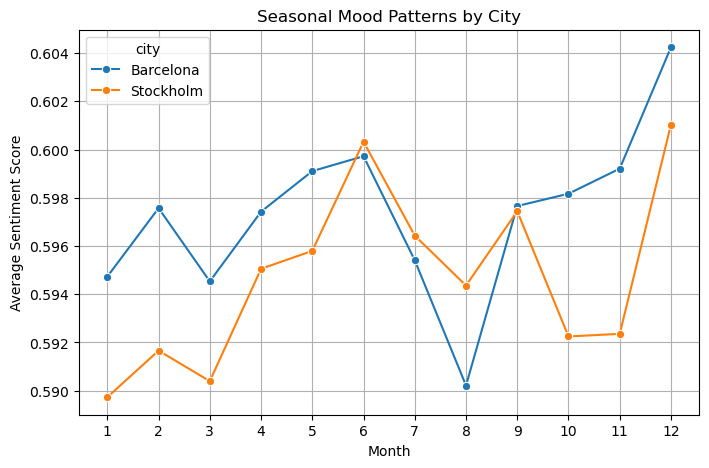

In [76]:
monthly_avg = df.groupby(['month', 'city'])['score'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.lineplot(data=monthly_avg, x='month', y='score', hue='city', marker='o')
plt.title("Seasonal Mood Patterns by City")
plt.xlabel("Month")
plt.ylabel("Average Sentiment Score")
plt.xticks(range(1,13))
plt.grid(True)
plt.show()

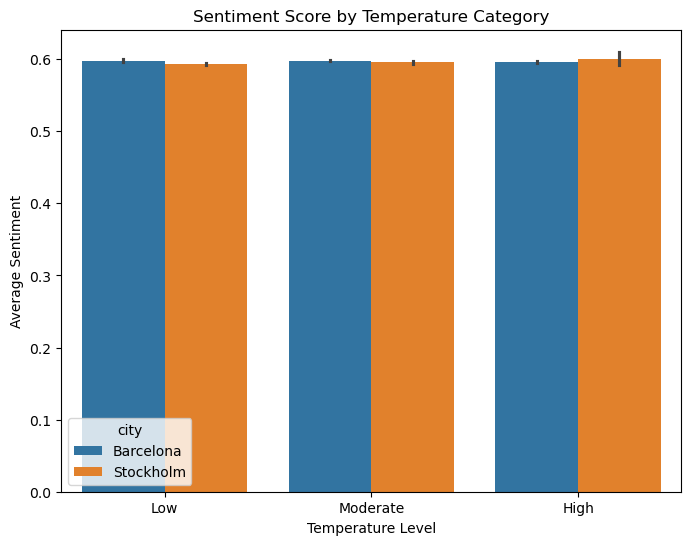

In [78]:
merged_df['temp_category'] = pd.cut(merged_df['temp'], bins=[-10, 10, 20, 35], labels=['Low', 'Moderate', 'High'])

plt.figure(figsize=(8, 6))
sns.barplot(data=merged_df, x='temp_category', y='score', hue='city')
plt.title("Sentiment Score by Temperature Category")
plt.xlabel("Temperature Level")
plt.ylabel("Average Sentiment")
plt.show()

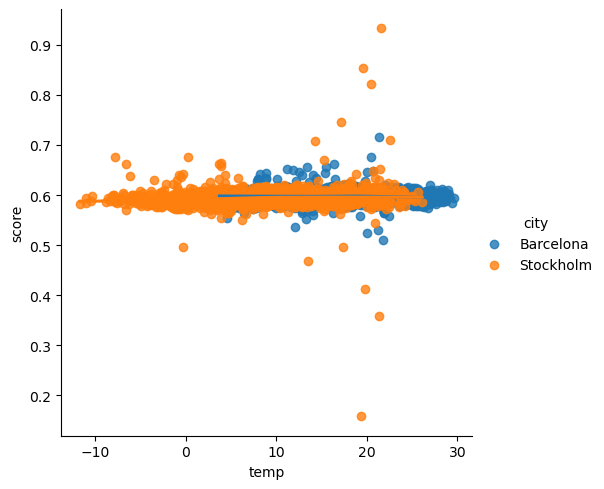

In [79]:
sns.lmplot(data=merged_df, x="temp", y="score", hue="city", lowess=True)

In [80]:
def categorize_temp(temp):
    if temp <= 5:
        return 'Cold'
    elif temp >= 25:
        return 'Hot'
    else:
        return 'Moderate'

In [82]:
df['temp_category'] = df['temp'].apply(categorize_temp)

In [83]:
df['temp_roll7_category'] = df['temp_roll7'].apply(categorize_temp)

In [84]:
df['temp_lag1'] = df['temp'].shift(1)  # 1-day lag
df['precip_lag7'] = df['precip'].rolling(window=7).mean()  # 7-day rolling

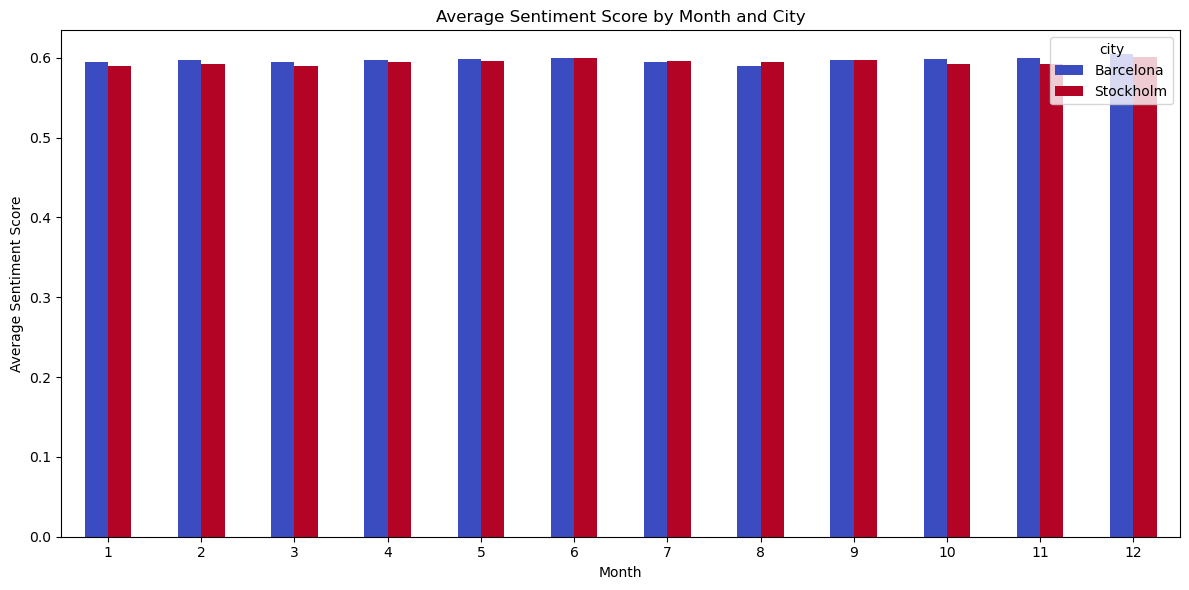

In [85]:
import matplotlib.pyplot as plt

ax = merged_df.groupby(['month', 'city'])['score'].mean().unstack().plot(kind='bar', figsize=(12,6), colormap='coolwarm')
ax.set_title("Average Sentiment Score by Month and City")
ax.set_ylabel("Average Sentiment Score")
ax.set_xlabel("Month")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [86]:
df['very_rainy'] = df['precip'] > 5
df['very_cold'] = df['temp'] < 5

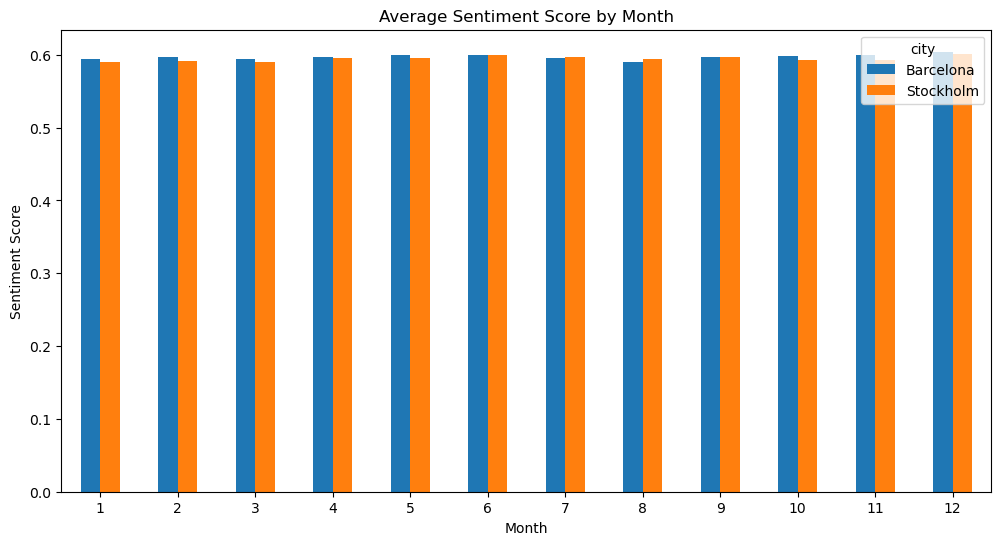

In [87]:
avg_mood_month = merged_df.groupby(['month', 'city'])['score'].mean().unstack()
avg_mood_month.plot(kind='bar', figsize=(12,6))
plt.title("Average Sentiment Score by Month")
plt.ylabel("Sentiment Score")
plt.xlabel("Month")
plt.xticks(rotation=0)
plt.show()

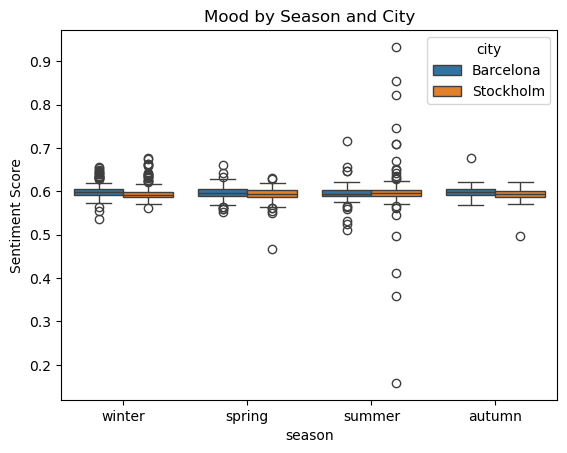

In [88]:
sns.boxplot(data=merged_df, x='season', y='score', hue='city')
plt.title("Mood by Season and City")
plt.ylabel("Sentiment Score")
plt.show()

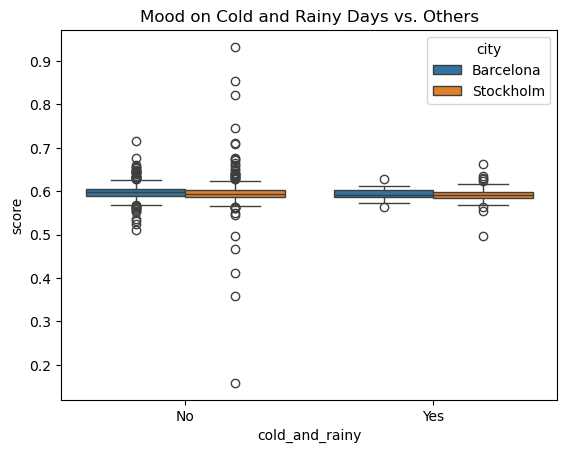

In [89]:
import numpy as np

merged_df['cold_and_rainy'] = np.where((merged_df['temp'] < 10) & (merged_df['precip'] > 1), 'Yes', 'No')

sns.boxplot(data=merged_df, x='cold_and_rainy', y='score', hue='city')
plt.title("Mood on Cold and Rainy Days vs. Others")
plt.show()